In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='microsoft/deberta-base'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'wd':[]}

In [4]:
g = 8
lr = 5.0e-5
weight_decay = [0.1, 0.01]

for wd in weight_decay:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}, weight decay {wd}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=wd,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['wd'].append(wd)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search microsoft/deberta-base, learning rate 5e-05, focal loss gamma 8, weight decay 0.1


Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.weight', 'classifier.weight', 'pooler.dense.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.5131	Val Loss:	1.8428	Accuracy:	0.4408	F1:	0.3834
2 / 30: Train Loss:	3.1158	Val Loss:	1.3991	Accuracy:	0.5621	F1:	0.5292
3 / 30: Train Loss:	1.0259	Val Loss:	1.2376	Accuracy:	0.5917	F1:	0.5711
4 / 30: Train Loss:	0.5346	Val Loss:	1.1493	Accuracy:	0.6006	F1:	0.5937
5 / 30: Train Loss:	0.1636	Val Loss:	1.0171	Accuracy:	0.6479	F1:	0.6313
6 / 30: Train Loss:	0.1071	Val Loss:	0.9544	Accuracy:	0.7278	F1:	0.7155
7 / 30: Train Loss:	0.0304	Val Loss:	0.9037	Accuracy:	0.7071	F1:	0.6943
8 / 30: Train Loss:	0.0128	Val Loss:	0.8821	Accuracy:	0.7160	F1:	0.6956
9 / 30: Train Loss:	0.0071	Val Loss:	0.8733	Accuracy:	0.7189	F1:	0.6998
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.76      0.72      0.74        67
               anecdote       0.86      0.88      0.87        43
         cherry picking       0.63      0.77      0.69        56
   

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.weight', 'classifier.weight', 'pooler.dense.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.6152	Val Loss:	1.9636	Accuracy:	0.2396	F1:	0.2369
2 / 30: Train Loss:	3.4361	Val Loss:	1.3614	Accuracy:	0.6124	F1:	0.5715
3 / 30: Train Loss:	1.0247	Val Loss:	1.1489	Accuracy:	0.6716	F1:	0.6284
4 / 30: Train Loss:	0.4357	Val Loss:	1.1239	Accuracy:	0.6243	F1:	0.6135
5 / 30: Train Loss:	0.1676	Val Loss:	0.9784	Accuracy:	0.6953	F1:	0.6795
6 / 30: Train Loss:	0.0647	Val Loss:	0.9153	Accuracy:	0.7337	F1:	0.7218
7 / 30: Train Loss:	0.0267	Val Loss:	0.8647	Accuracy:	0.7308	F1:	0.7103
8 / 30: Train Loss:	0.0132	Val Loss:	0.8495	Accuracy:	0.7367	F1:	0.7083
9 / 30: Train Loss:	0.0063	Val Loss:	0.8377	Accuracy:	0.7426	F1:	0.7177
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.71      0.76      0.73        67
               anecdote       0.86      0.84      0.85        43
         cherry picking       0.75      0.70      0.72        56
   

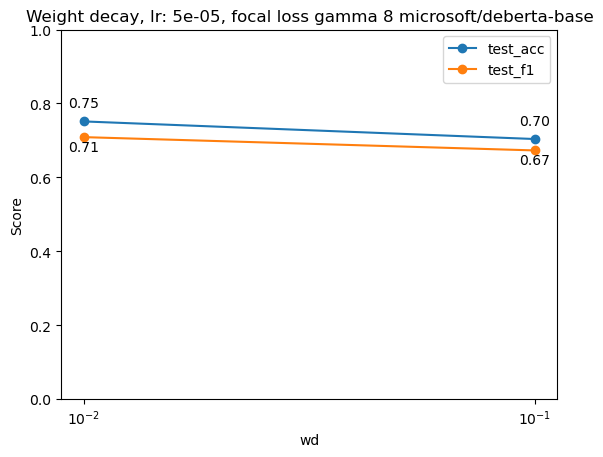

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Weight decay, lr: {lr}, focal loss gamma {g} {model_checkpoint}',
                        column='wd',
                        sci_format=True)

In [6]:
%reset -f